### IMPORTATION DES LIBRARIES



Pour le traitement des données les librairies que j'ai besoin:
<br><br>
<b>Python 3.x</b> - j'utilise 3.9<br>
<b>nltk</b> - Natural Language Toolkit, un module Python dédié au traitement du langage naturel.<br>
<b>matplotlib</b> - la librairie pour faire les graphique

In [1]:
import nltk

In [2]:
#nltk.download('punkt')

In [3]:
#nltk.download('stopwords')

In [4]:
#nltk.download('averaged_perceptron_tagger')

In [5]:
#nltk.download()

In [6]:
from nltk import punkt

In [7]:
from nltk.corpus import stopwords

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

### La préparations des données pour l'analyse


Avant de pouvoir procéder à une analyse stylométrique, nous devons charger les fichiers dans contenant les livres de Mary Shelley, des courts novels généré par GPT3 et le novel écrit par un fanfiction dans des structures de données pratiques en mémoire informatique.

d'abors on va ouvrir le txt document et le transformer en string

In [10]:
def text_to_string(filename):
    with open(filename) as infile:
        return infile.read()

In [11]:
strings_by_author = dict()
strings_by_author['Shelley'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')+text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/LastMan.txt')
strings_by_author['Unwritten'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/unwritten.txt')
strings_by_author['FanFiction'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/fanfiction.txt')
print(strings_by_author['Unwritten'][:300]) 


In the days that followed, I lost myself in the old books at my father’s library. I could not read them all, of course; but I read a great many of them. I rose early, before the sun, and then I could not sleep at night. I had a nameless, restless energy; but I did not know what to do with it. I was 


Return dictionary of tokenized words by corpus by book + lower case tokens

In [12]:
def word_dict(strings_by_author):
    
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_by_author

In [13]:
words_by_author = word_dict(strings_by_author)
for author in words_by_author:
    print(author, len(words_by_author[author]))
    #print(author, words_by_author[author][:300])

Shelley 247598
Unwritten 1064
FanFiction 123345


In [14]:
LINES = ['-', ':', '--', '-.']


In [15]:
def shortest_corpus(words_by_author):
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        
    len_shortest_corpus = min(word_count)
    return len_shortest_corpus

In [16]:
len_shortest_corpus = shortest_corpus(words_by_author)
print('Number of words in shortest corpus is = {}\n'.format(len_shortest_corpus))

Number of words in shortest corpus is = 1064



 Plot stopwords freq by author, truncated to shortest corpus length.

In [17]:
%matplotlib inline

In [18]:
def stopwords_test(words_by_author, len_shortest_corpus):
    stopwords_by_author_freq_dist = dict()
    plt.figure(2)
    stop_words = set(stopwords.words('english'))  # Use set for speed.
    print('Number of stopwords = {}\n'.format(len(stop_words)))
    #print('Stopwords = {}\n'.format(stop_words))
    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author]
        [:len_shortest_corpus] if word in stop_words]
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_freq_dist[author].plot(30,title=author)

Number of stopwords = 179



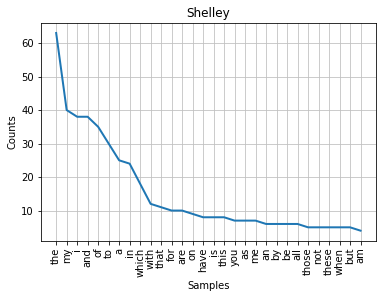

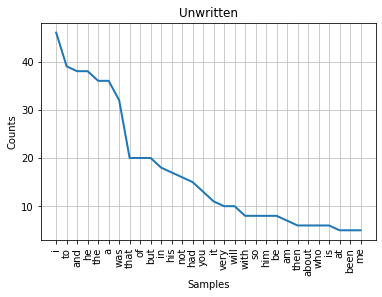

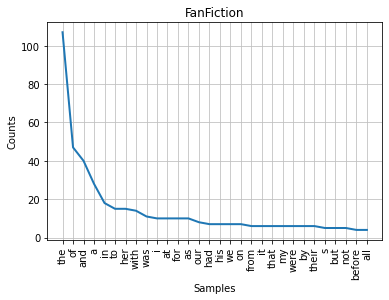

In [19]:
stopwords_test(words_by_author, len_shortest_corpus)

word_length_test par mendenhall test

In [20]:
def mendenhall_test(words_by_author, len_shortest_corpus):
    mendenhall_by_author_freq_dist = dict()
    plt.figure(2)
    for i, author in enumerate(words_by_author):
        token_lengths = [len(word) for word in words_by_author[author]
        [:len_shortest_corpus]]
        mendenhall_by_author_freq_dist[author] = nltk.FreqDist(token_lengths)
        mendenhall_by_author_freq_dist[author].plot(15,title=author)

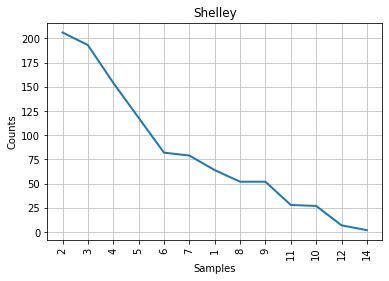

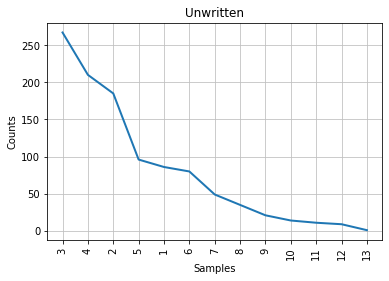

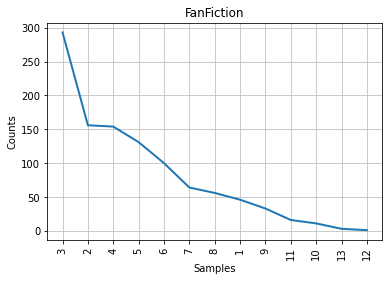

In [21]:
mendenhall_test(words_by_author, len_shortest_corpus)

In [22]:
def vocab_test(words_by_author):
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'Unwritten':
            # Combine corpus for author & unknown & find 1000 most-common words.
            combined_corpus = (words_by_author[author] +
                               words_by_author['Unwritten'])
            author_proportion = (len(words_by_author[author]) /
                                 len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0

            # Calculate observed vs. expected word counts.
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author -
                                expected_count_author) ** 2 /
                               expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))

    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

In [23]:
vocab_test(words_by_author)

Chi-squared for Shelley = 11.8
Chi-squared for FanFiction = 17.2
Most-likely author by vocabulary is Shelley



In [24]:
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    by_author_pos_freq_dist = dict()
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author]
                                                        [:len_shortest_corpus])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,title=author)

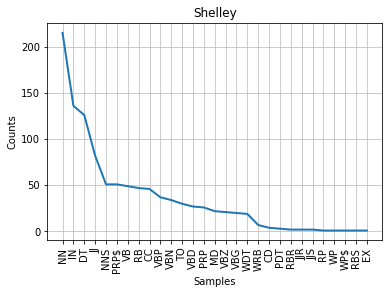

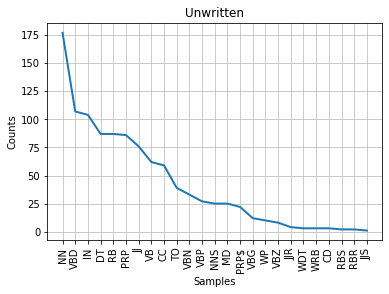

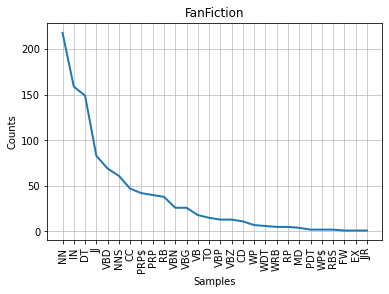

In [25]:
parts_of_speech_test(words_by_author, len_shortest_corpus)

In [43]:
def delta_method_test(words_by_author):
    whole_corpus = []
    for word in words_by_author:
        whole_corpus += words_by_author[author]

    # Get a frequency distribution
    whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
    return whole_corpus_freq_dist[ :30 ]

In [44]:
print(delta_method_test(words_by_author))

[('the', 21303), ('and', 13695), ('of', 12345), ('to', 10884), ('a', 7035), ('her', 6081), ('his', 5868), ('was', 5823), ('i', 5643), ('in', 5499), ('he', 5361), ('that', 4533), ('my', 4047), ('with', 3432), ('she', 3366), ('had', 3306), ('it', 2712), ('not', 2688), ('as', 2685), ('for', 2631), ('on', 2511), ('but', 2424), ('at', 2157), ('by', 2148), ('from', 2070), ('him', 2007), ('me', 1983), ('you', 1764), ('were', 1650), ('which', 1650)]


 Calculate Jaccard similarity of each known corpus to unknown corpus.

In [33]:
def jaccard_test(words_by_author, len_shortest_corpus):
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['Unwritten']
                               [:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'Unwritten')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words)) / (len(unique_words_author) +
                                                   len(unique_words_unknown) -
                                                   len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

In [34]:
jaccard_test(words_by_author, len_shortest_corpus)

Jaccard Similarity for Shelley = 0.15333333333333332
Jaccard Similarity for FanFiction = 0.14979757085020243
Most-likely author by similarity is Shelley
